In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dfM = pd.read_csv('Limpio_Brasil.csv')
dfM.drop(columns=['Unnamed: 0'], inplace=True)
dfM.drop(columns=['last_scraped', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)



In [4]:
dfM.head()
dfM.info()
#droppear last_scraped droppear source name host_since host_about host_location description host_name first_revie last_review
#dfM.drop(columns=['last_scraped', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36967 entries, 0 to 36966
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              36967 non-null  object 
 1   host_response_rate              36967 non-null  object 
 2   host_acceptance_rate            36967 non-null  object 
 3   host_is_superhost               36967 non-null  object 
 4   host_verifications              36967 non-null  object 
 5   host_has_profile_pic            36967 non-null  object 
 6   host_identity_verified          36967 non-null  object 
 7   neighbourhood_cleansed          36967 non-null  object 
 8   property_type                   36967 non-null  object 
 9   room_type                       36967 non-null  object 
 10  amenities                       36967 non-null  object 
 11  has_availability                36967 non-null  object 
 12  instant_bookable                

## Quitar signos

In [5]:
dfM['host_acceptance_rate'] = dfM['host_acceptance_rate'].str.replace('%', '').astype(float)

In [6]:
unico_acceptance=np.unique(dfM['host_acceptance_rate'])
unico_acceptance

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [7]:
dfM['host_response_rate'] = dfM['host_response_rate'].str.replace('%', '').astype(float)


In [8]:
unico_acceptance=np.unique(dfM['host_response_rate'])
unico_acceptance

array([  0.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  25.,
        27.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  50.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100.])

## Convertir a dicotomicas

In [9]:
unico_acceptance=np.unique(dfM['host_response_rate'])
unico_acceptance

array([  0.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  25.,
        27.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  50.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100.])

In [10]:
#saber la cantidad de cada respuesta 
dfM['host_response_rate'].value_counts()

host_response_rate
100.0    21439
89.0      5240
0.0       1467
90.0       827
99.0       794
         ...  
52.0         1
53.0         1
47.0         1
42.0         1
23.0         1
Name: count, Length: 93, dtype: int64

In [11]:
dfM['host_response_rate']=dfM['host_response_rate'].replace([100],"Respondio todas")
dfM['host_response_rate']=dfM['host_response_rate'].replace([ 0.,   4.,   5.,   8.,   9.,  10.,  11.,  13.,  14.,  16.,  17.,
        18.,  19.,  20.,  22.,  23.,  25.,  27.,  29.,  30.,  33.,  36.,
        38.,  39.,  40.,  43.,  46.,  47.,  48.,  49.,  50.,  53.,  54.,
        55.,  56.,  57.,  58.,  60.,  61.,  62.,  63.,  64.,  66.,  67.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.],"No respondio todas")
dfM['host_response_rate'].value_counts()

host_response_rate
Respondio todas       21439
No respondio todas    15388
44.0                     27
34.0                     14
65.0                     14
6.0                      10
15.0                      9
35.0                      8
7.0                       8
59.0                      8
41.0                      8
68.0                      7
37.0                      6
3.0                       4
32.0                      4
21.0                      4
31.0                      3
12.0                      2
45.0                      2
52.0                      1
42.0                      1
Name: count, dtype: int64

In [12]:
dfM['host_response_time'].value_counts()

host_response_time
within an hour        19227
within a day           8780
within a few hours     6136
a few days or more     2824
Name: count, dtype: int64

In [13]:
unico1=np.unique(dfM['host_response_time'])
unico1

array(['a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)

In [14]:
dfM['host_response_time']=dfM['host_response_time'].replace(['a few days or more', 'within a day', 'within a few hours'],"No in an hour")
dfM

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,No respondio todas,88.0,f,"['email', 'phone']",t,t,Botafogo,Private room in home,Private room,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,No in an hour,No respondio todas,76.0,f,"['email', 'phone']",t,t,Centro,Entire rental unit,Entire home/apt,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,within an hour,No respondio todas,73.0,t,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,within an hour,Respondio todas,97.0,t,"['email', 'phone']",t,t,Lagoa,Entire rental unit,Entire home/apt,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,No in an hour,No respondio todas,67.0,f,"['email', 'phone']",t,t,Flamengo,Entire rental unit,Entire home/apt,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,within an hour,Respondio todas,98.0,t,"['email', 'phone']",t,f,Centro,Private room in rental unit,Private room,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.4,0.70
36963,No in an hour,No respondio todas,76.0,f,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,1.0,0.70
36964,within an hour,Respondio todas,76.0,f,"['email', 'phone']",t,t,Recreio dos Bandeirantes,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,4.0,0.70
36965,within an hour,Respondio todas,94.0,f,"['email', 'phone']",f,t,Barra da Tijuca,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.0,0.70


In [15]:
unico1=np.unique(dfM['host_verifications'])
unico1

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['email', 'work_email']", "['email']", "['phone', 'work_email']",
       "['phone']", '[]'], dtype=object)

In [16]:
conteo_valores = dfM['host_verifications'].value_counts()
conteo_valores


host_verifications
['email', 'phone']                  28961
['phone']                            5395
['email', 'phone', 'work_email']     2376
['phone', 'work_email']               165
['email']                              47
[]                                     18
['email', 'work_email']                 5
Name: count, dtype: int64

In [17]:
dfM['host_verifications']=dfM['host_verifications'].replace(["['email', 'phone']"],"Solo email y phone")
dfM['host_verifications']=dfM['host_verifications'].replace(["['email', 'phone', 'work_email']", "[]",
       "['email', 'work_email']", "['email']", "['phone', 'work_email']",
       "['phone']", "['work_email']"],"Diversas verificaciones")
dfM

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,No respondio todas,88.0,f,Solo email y phone,t,t,Botafogo,Private room in home,Private room,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,No in an hour,No respondio todas,76.0,f,Solo email y phone,t,t,Centro,Entire rental unit,Entire home/apt,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,within an hour,No respondio todas,73.0,t,Solo email y phone,t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,within an hour,Respondio todas,97.0,t,Solo email y phone,t,t,Lagoa,Entire rental unit,Entire home/apt,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,No in an hour,No respondio todas,67.0,f,Solo email y phone,t,t,Flamengo,Entire rental unit,Entire home/apt,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,within an hour,Respondio todas,98.0,t,Solo email y phone,t,f,Centro,Private room in rental unit,Private room,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.4,0.70
36963,No in an hour,No respondio todas,76.0,f,Solo email y phone,t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,1.0,0.70
36964,within an hour,Respondio todas,76.0,f,Solo email y phone,t,t,Recreio dos Bandeirantes,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,4.0,0.70
36965,within an hour,Respondio todas,94.0,f,Solo email y phone,f,t,Barra da Tijuca,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.0,0.70


In [18]:
conteo_property = dfM['property_type'].value_counts()
conteo_property

property_type
Entire rental unit               23478
Private room in rental unit       4419
Entire home                       1744
Entire condo                      1732
Private room in home              1290
                                 ...  
Shared room in tiny home             1
Castle                               1
Shared room in nature lodge          1
Private room in vacation home        1
Shipping container                   1
Name: count, Length: 82, dtype: int64

In [19]:
dfM['property_type'].value_counts()

property_type
Entire rental unit               23478
Private room in rental unit       4419
Entire home                       1744
Entire condo                      1732
Private room in home              1290
                                 ...  
Shared room in tiny home             1
Castle                               1
Shared room in nature lodge          1
Private room in vacation home        1
Shipping container                   1
Name: count, Length: 82, dtype: int64

In [20]:
#no entire rental
dfM['property_type']=dfM['property_type'].replace(['Boat', 'Campsite', 'Casa particular', 'Castle', 'Dome', 'Earthen home', 'Entire bungalow', 'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire cottage', 'Entire guest suite', 'Entire guesthouse', 'Entire home', 'Entire home/apt', 'Entire hostel', 'Entire in-law', 'Entire loft', 'Entire place', 'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Farm stay', 'Holiday park', 'Hut', 'Private room', 'Private room in barn', 'Private room in bed and breakfast', 'Private room in bungalow', 'Private room in cabin', 'Private room in casa particular', 'Private room in castle', 'Private room in chalet', 'Private room in condo', 'Private room in cottage', 'Private room in dome', 'Private room in dorm', 'Private room in earthen home', 'Private room in farm stay', 'Private room in floor', 'Private room in guest suite', 'Private room in guesthouse', 'Private room in home', 'Private room in hostel', 'Private room in houseboat', 'Private room in hut', 'Private room in lighthouse', 'Private room in loft', 'Private room in minsu', 'Private room in nature lodge', 'Private room in pension', 'Private room in rental unit', 'Private room in resort', 'Private room in serviced apartment', 'Private room in shipping container', 'Private room in tent', 'Private room in tiny home', 'Private room in tower', 'Private room in townhouse', 'Private room in vacation home', 'Private room in villa', 'Room in aparthotel', 'Room in bed and breakfast', 'Room in boutique hotel', 'Room in casa particular', 'Room in hostel', 'Room in hotel', 'Room in serviced apartment', 'Shared room in bed and breakfast', 'Shared room in boutique hotel', 'Shared room in cabin', 'Shared room in casa particular', 'Shared room in condo', 'Shared room in dorm', 'Shared room in farm stay', 'Shared room in guest suite', 'Shared room in guesthouse', 'Shared room in home', 'Shared room in hostel', 'Shared room in hotel', 'Shared room in loft', 'Shared room in rental unit', 'Shared room in serviced apartment', 'Shared room in tent', 'Shared room in tiny home', 'Shared room in townhouse', 'Shipping container', 'Tent', 'Tiny home', 'Tower']
,"no entire rental")

In [21]:
conteo_room = dfM['room_type'].value_counts()
conteo_room

room_type
Entire home/apt    29079
Private room        7231
Shared room          629
Hotel room            28
Name: count, dtype: int64

In [22]:
unico4=np.unique(dfM['room_type'])
unico4

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [23]:
dfM['room_type']=dfM['room_type'].replace(['Hotel room', 'Private room', 'Shared room'],"No entire home")
dfM

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,No respondio todas,88.0,f,Solo email y phone,t,t,Botafogo,no entire rental,No entire home,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,No in an hour,No respondio todas,76.0,f,Solo email y phone,t,t,Centro,Entire rental unit,Entire home/apt,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,within an hour,No respondio todas,73.0,t,Solo email y phone,t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,within an hour,Respondio todas,97.0,t,Solo email y phone,t,t,Lagoa,Entire rental unit,Entire home/apt,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,No in an hour,No respondio todas,67.0,f,Solo email y phone,t,t,Flamengo,Entire rental unit,Entire home/apt,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,within an hour,Respondio todas,98.0,t,Solo email y phone,t,f,Centro,no entire rental,No entire home,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.4,0.70
36963,No in an hour,No respondio todas,76.0,f,Solo email y phone,t,t,Copacabana,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,1.0,0.70
36964,within an hour,Respondio todas,76.0,f,Solo email y phone,t,t,Recreio dos Bandeirantes,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,4.0,0.70
36965,within an hour,Respondio todas,94.0,f,Solo email y phone,f,t,Barra da Tijuca,Entire rental unit,Entire home/apt,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.0,0.70


In [24]:
conteo_availability= dfM['availability_30'].value_counts()
conteo_availability

availability_30
30    6723
29    5643
0     5005
28    2306
27    1559
23    1347
25    1038
24    1004
26     771
21     617
22     615
20     609
18     579
5      574
19     570
17     570
6      548
12     537
9      536
13     532
15     532
14     518
11     508
16     507
8      506
10     494
1      486
7      467
4      436
3      416
2      414
Name: count, dtype: int64

In [25]:
dfM['availability_30']=dfM['availability_30'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],"15 dias o menos")
dfM['availability_30']=dfM['availability_30'].replace([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],"mayor a 15 dias")

In [26]:
conteo_accommodates= dfM['accommodates'].value_counts()
conteo_accommodates

accommodates
4.0    10881
2.0     9971
3.0     4388
6.0     4024
5.0     2880
1.0     1589
3.7     1275
8.0     1102
7.0      696
9.0      161
Name: count, dtype: int64

In [27]:
dfM['accommodates']=dfM['accommodates'].replace([1.0,2.0,3.0],"Menor al promedio")
dfM['accommodates']=dfM['accommodates'].replace([4.0,5.0,6.0,7.0],"El promedio y mayores")

## Convertir variables de objeto a numericas

In [28]:
unico2=np.unique(dfM['neighbourhood_cleansed'])
unico2

array(['AboliÃ§Ã£o', 'Alto da Boa Vista', 'Anchieta', 'AndaraÃ\xad',
       'Anil', 'BancÃ¡rios', 'Bangu', 'Barra da Tijuca',
       'Barra de Guaratiba', 'Barros Filho', 'Benfica', 'Bento Ribeiro',
       'Bonsucesso', 'Botafogo', 'BrÃ¡s de Pina', 'Cachambi', 'Cacuia',
       'Camorim', 'Campinho', 'Campo Grande', 'Cascadura', 'Catete',
       'Catumbi', 'Cavalcanti', 'Centro', 'Cidade Nova',
       'Cidade UniversitÃ¡ria', 'Cidade de Deus', 'CocotÃ¡',
       'Coelho Neto', 'ColÃ©gio', 'Complexo do AlemÃ£o', 'Copacabana',
       'Cordovil', 'Cosme Velho', 'Cosmos', 'Curicica', 'Del Castilho',
       'Deodoro', 'Encantado', 'Engenheiro Leal', 'Engenho Novo',
       'Engenho da Rainha', 'Engenho de Dentro', 'EstÃ¡cio', 'Flamengo',
       'Freguesia (Ilha)', 'Freguesia (JacarepaguÃ¡)', 'GaleÃ£o',
       'Gamboa', 'GardÃªnia Azul', 'GericinÃ³', 'GlÃ³ria', 'GrajaÃº',
       'Grumari', 'Guadalupe', 'Guaratiba', 'GÃ¡vea', 'HigienÃ³polis',
       'HonÃ³rio Gurgel', 'HumaitÃ¡', 'InhaÃºma', 'In

In [29]:
# Crear una instancia de LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Ajustar y transformar la columna 'neighbourhood_cleansed'
dfM['neighbourhood_cleansed_encoded'] = le.fit_transform(dfM['neighbourhood_cleansed'])+1

# Verificar el resultado
print(dfM[['neighbourhood_cleansed', 'neighbourhood_cleansed_encoded']])

         neighbourhood_cleansed  neighbourhood_cleansed_encoded
0                      Botafogo                              14
1                        Centro                              25
2                    Copacabana                              33
3                         Lagoa                              74
4                      Flamengo                              46
...                         ...                             ...
36962                    Centro                              25
36963                Copacabana                              33
36964  Recreio dos Bandeirantes                             110
36965           Barra da Tijuca                               8
36966  Recreio dos Bandeirantes                             110

[36967 rows x 2 columns]


In [30]:
#amenities
#room_type
# Crear una instancia de LabelEncoder
from sklearn.preprocessing import LabelEncoder

le4 = LabelEncoder()

# Ajustar y transformar la columna 'neighbourhood_cleansed'
dfM['amenities_encoded'] = le4.fit_transform(dfM['amenities'])+1

# Verificar el resultado
print(dfM[['amenities', 'amenities_encoded']])


                                               amenities  amenities_encoded
0      ["Host greets you", "Dishes and silverware", "...              28774
1      ["Stove", "Cooking basics", "Refrigerator", "D...              31464
2      ["Host greets you", "Dishes and silverware", "...              28409
3      ["Baking sheet", "Dishes and silverware", "Fre...               9806
4      ["Air conditioning", "TV with standard cable",...                915
...                                                  ...                ...
36962  ["Dishes and silverware", "Clothing storage", ...              13211
36963  ["Dishes and silverware", "Self check-in", "El...              19733
36964  ["Air conditioning", "Wifi", "Kitchen", "TV", ...               5826
36965  ["Air conditioning", "Wifi", "Kitchen", "TV", ...               5834
36966  ["Air conditioning", "Wifi", "Kitchen", "TV", ...               5826

[36967 rows x 2 columns]


## Convertir Dicotomicas a Numericas

In [31]:
#convertid a numerica host_is_superhost
dfM['host_is_superhost'] = dfM['host_is_superhost'].map({'t': 1, 'f': 0})

In [32]:
#host_has_profile_pic
dfM['host_has_profile_pic'] = dfM['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [33]:
#host_identity_verified
dfM['host_identity_verified'] = dfM['host_identity_verified'].map({'t': 1, 'f': 0})

In [34]:
#has_availability
dfM['has_availability'] = dfM['has_availability'].map({'t': 1, 'f': 0})

In [35]:
#instant_bookable
dfM['instant_bookable'] = dfM['instant_bookable'].map({'t': 1, 'f': 0})

In [36]:
dfM['host_response_rate'] = dfM['host_response_rate'].map({'Respondio todas': 1, 'No respondio todas': 0})

In [37]:
dfM['host_response_time'] = dfM['host_response_time'].map({'within an hour': 1, 'No in an hour': 0})

In [38]:
dfM['host_verifications'] = dfM['host_verifications'].map({'Solo email y phone': 1, 'Diversas verificaciones': 0})


In [39]:
dfM['property_type'] = dfM['property_type'].map({'Entire rental unit': 1, 'no entire rental': 0})

In [40]:
dfM['room_type'] = dfM['room_type'].map({'Entire home/apt': 1, 'No entire home': 0})

In [41]:
dfM['availability_30'] = dfM['availability_30'].map({'mayor a 15 dias': 1, '15 dias o menos': 0})

In [42]:
dfM['accommodates'] = dfM['accommodates'].map({'El promedio y mayores': 1, 'Menor al promedio': 0})

## HEATMAP


In [43]:
#droppear columnas 0,4,7,8,9,10
dfM.drop(columns=[ 'neighbourhood_cleansed', 'amenities',], inplace=True)
#dfM.drop(columns=['number_of_reviews_l30d','availability_30','availability_60' , 'availability_90','availability_365'], inplace=True)


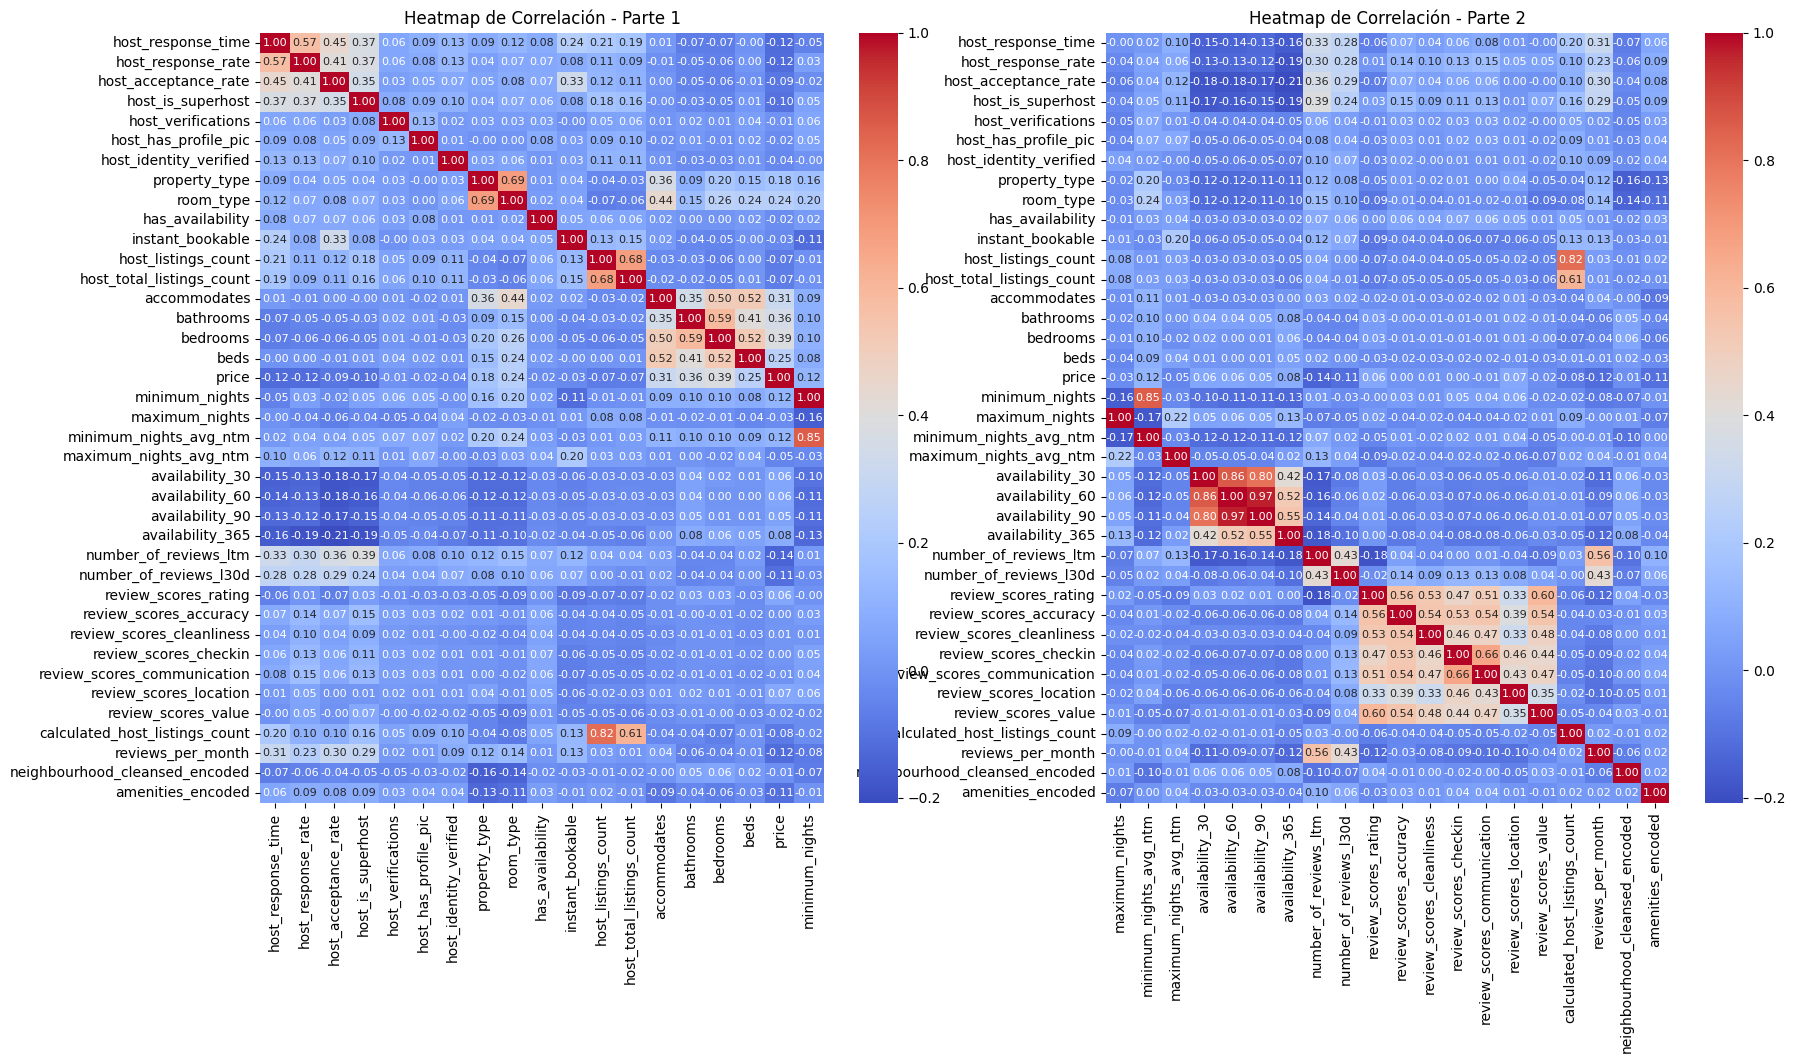

In [44]:
corr_matrix = dfM.corr()
num_columns = corr_matrix.shape[1]

# Dividir la matriz de correlación en dos partes
corr_matrix_1 = corr_matrix.iloc[:, :num_columns // 2]
corr_matrix_2 = corr_matrix.iloc[:, num_columns // 2:]
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Ajusta el tamaño según tus necesidades

# Heatmap para la primera mitad de la matriz de correlación
sns.heatmap(corr_matrix_1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[0],annot_kws={"size": 8})
ax[0].set_title('Heatmap de Correlación - Parte 1')

# Heatmap para la segunda mitad de la matriz de correlación
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[1],annot_kws={"size": 8})
ax[1].set_title('Heatmap de Correlación - Parte 2')

plt.show()

In [45]:
#crear un archivo csv del dfM
dfM.to_csv('Datos_limpios_Mexico_V3.csv', index=False)